In [2]:
#import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set()

In [3]:
#read the file with organized data
diabetes_use = pd.read_csv('dataset/diabetes_use.csv')

## Explore to the distribution of our response data

First of all, we are showing the distribution of the data in **Diabetes_binary** using `catplot`.

C:\Users\WeiZh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


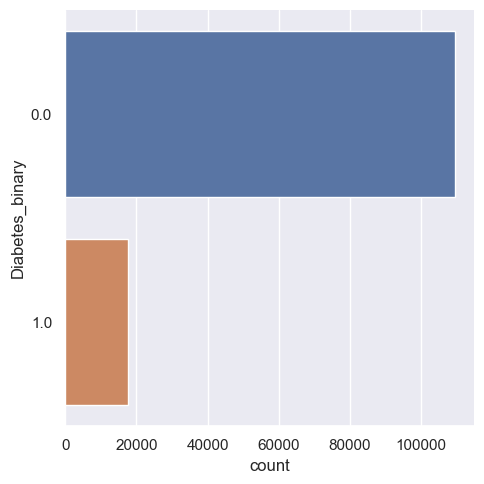

In [4]:
# Plot of diabetes_binary vs count
sb.catplot(y='Diabetes_binary', data = diabetes_use, kind = "count")

## Correlation between categorical data and Diabetes_binary
To show the correlation between **Diabetes_binary** and **each categorical data**, we use `catplot` to visualize it. From the graph, we can simply notice the difference between **the difference ratio of patients with diabetes** and the respective **categorical data**. Furthermore, it can also compare the specific group of people *(i.e. the people with no diabetes)* with the respective **categorical data**. Thus, it helps us to determine the variables that we need to use for our model training.   


In [18]:
#list out the numerical variable which we do not need to plot the relationship in this set of graphs
list = ['Diabetes_binary', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

#plotting the graph
for var in diabetes_use:
    if var not in list:
        f = plt.figure(figsize=(4,4))
        sb.catplot(y='Diabetes_binary', data = diabetes_use, col = var, kind = 'count', col_wrap = 2, height = 8)

After learning every graph we plotted, we sorted out some of the variables that were suitable for our model training. The variables shown below are the variables we chose.<br>

### **High Blood Pressure**(HighBP)
For the variable `HighBP`, through our observation, the ratio of patients with diabetes and patients with no diabetes for the `HighBP = 0` category is significantly higher than the `Highbp = 1` category. Therefore, it is a good variable to use in diabetes prediction.
>**0** = No High Blood Pressure <br>
>**1** = High Blood Pressure

### **High Cholesterol**(HighChol)
Similar to the above, for the variable `HighChol`, the ratio of patients with diabetes and patients with no diabetes for the `HighChol = 0` category is significantly higher than the `HighChol = 1` category. Therefore, it is also suitable for predicting diabetes.
>**0** = No High Cholesterol <br>
>**1** = High Cholesterol

### **Sex**(Sex)
For the variable `Sex`, through our observation of the bar chart, we choose it as one of the parameters because it has a significant difference between the number of the ***men with no diabetes*** and the number of the ***women with no diabetes***. The number of ***men and women with diabetes*** are almost the same.
>**0** : Woman <br>
>**1** : Man

### Physical Activity(PhysActivity)
For the variable `PhysActivity`, through our observation of the barchart, there is a significant difference between the ratio of ***diabetes_binary (1 && 0)*** between  `PhysActivity = 0` and `PhysActivity = 1`.  Thus it is a good variable.
> **0** : Does not have physical activity past 30 days <br>
> **1** : Does have physical activity past 30 days

### Difficulty of Walk(DiffWalk)
For the variable `DiffWalk`, through our observation of the bar chart, there is a significant difference between the ratio of ***diabetes_binary (1 && 0)*** between `DiffWalk = 0` and `DiffWalk = 1`. Thus it is a good variable.
> **0** : Does not have serious difficulty walking or climbing stairs <br>
>  **1**: Does have serious difficulty walking or climbing stairs

## Correlation between numerical data and Diabetes_binary

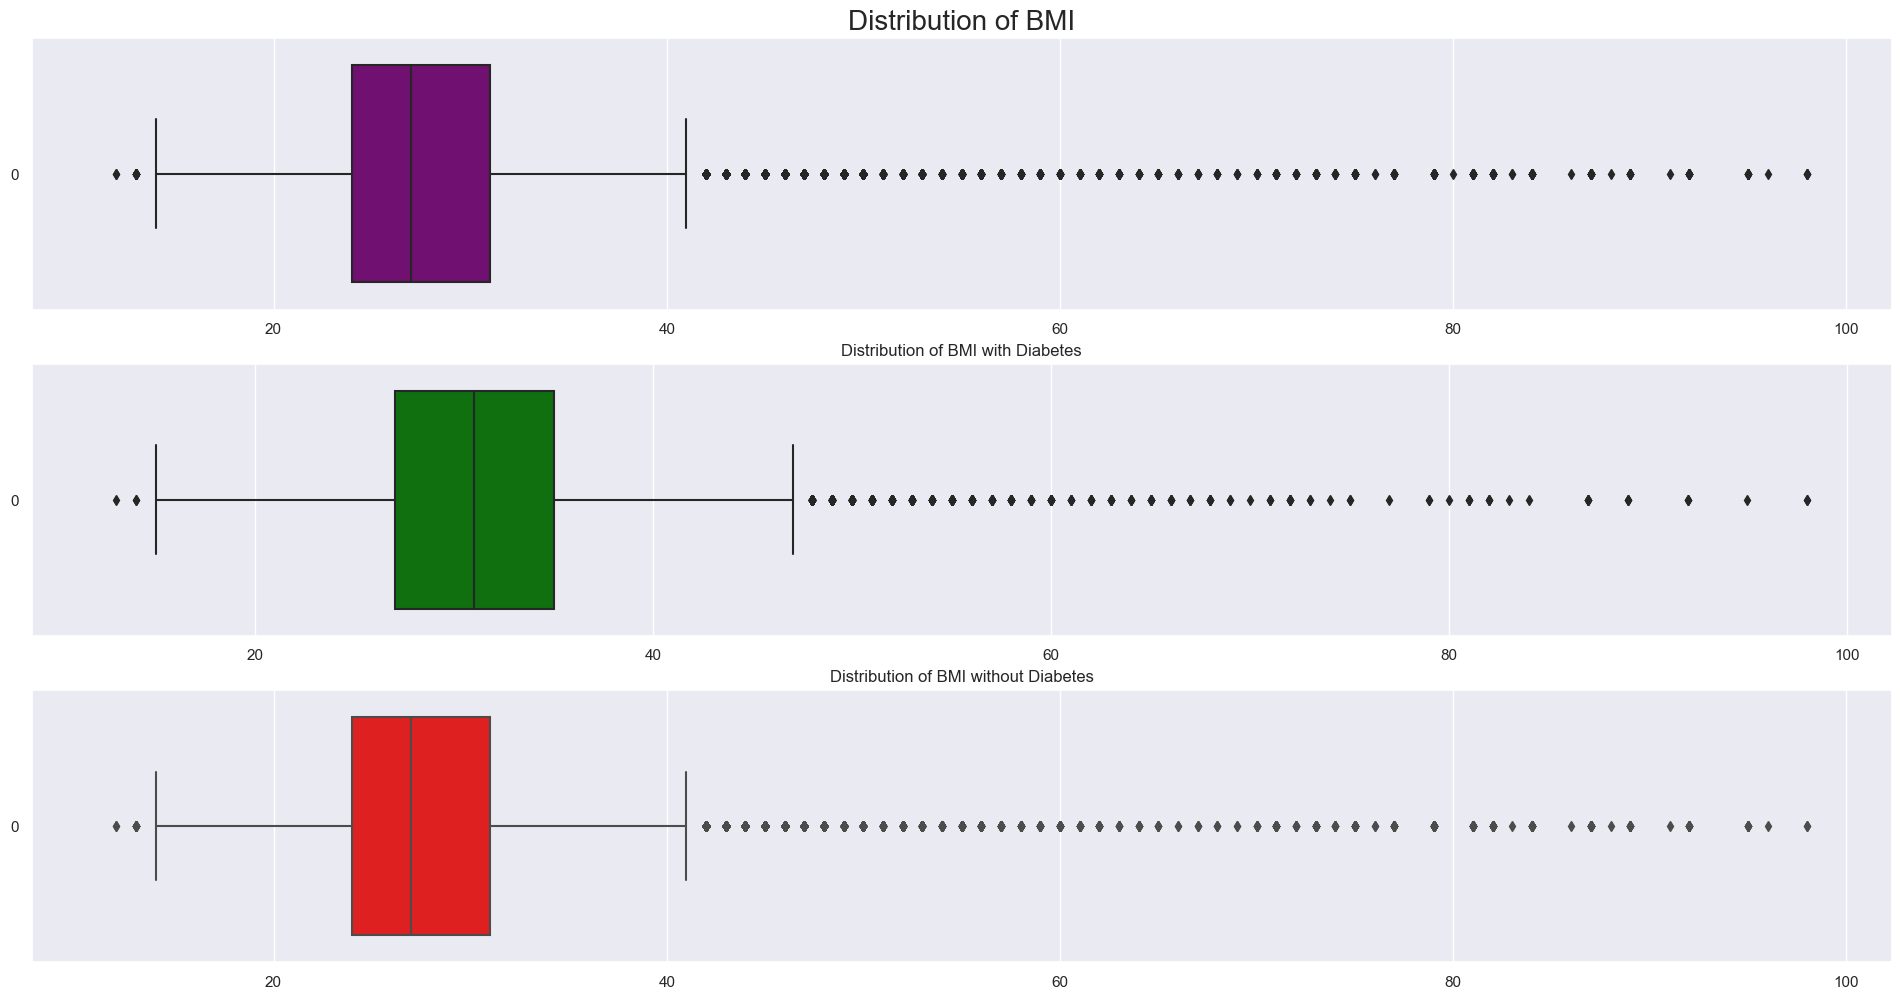

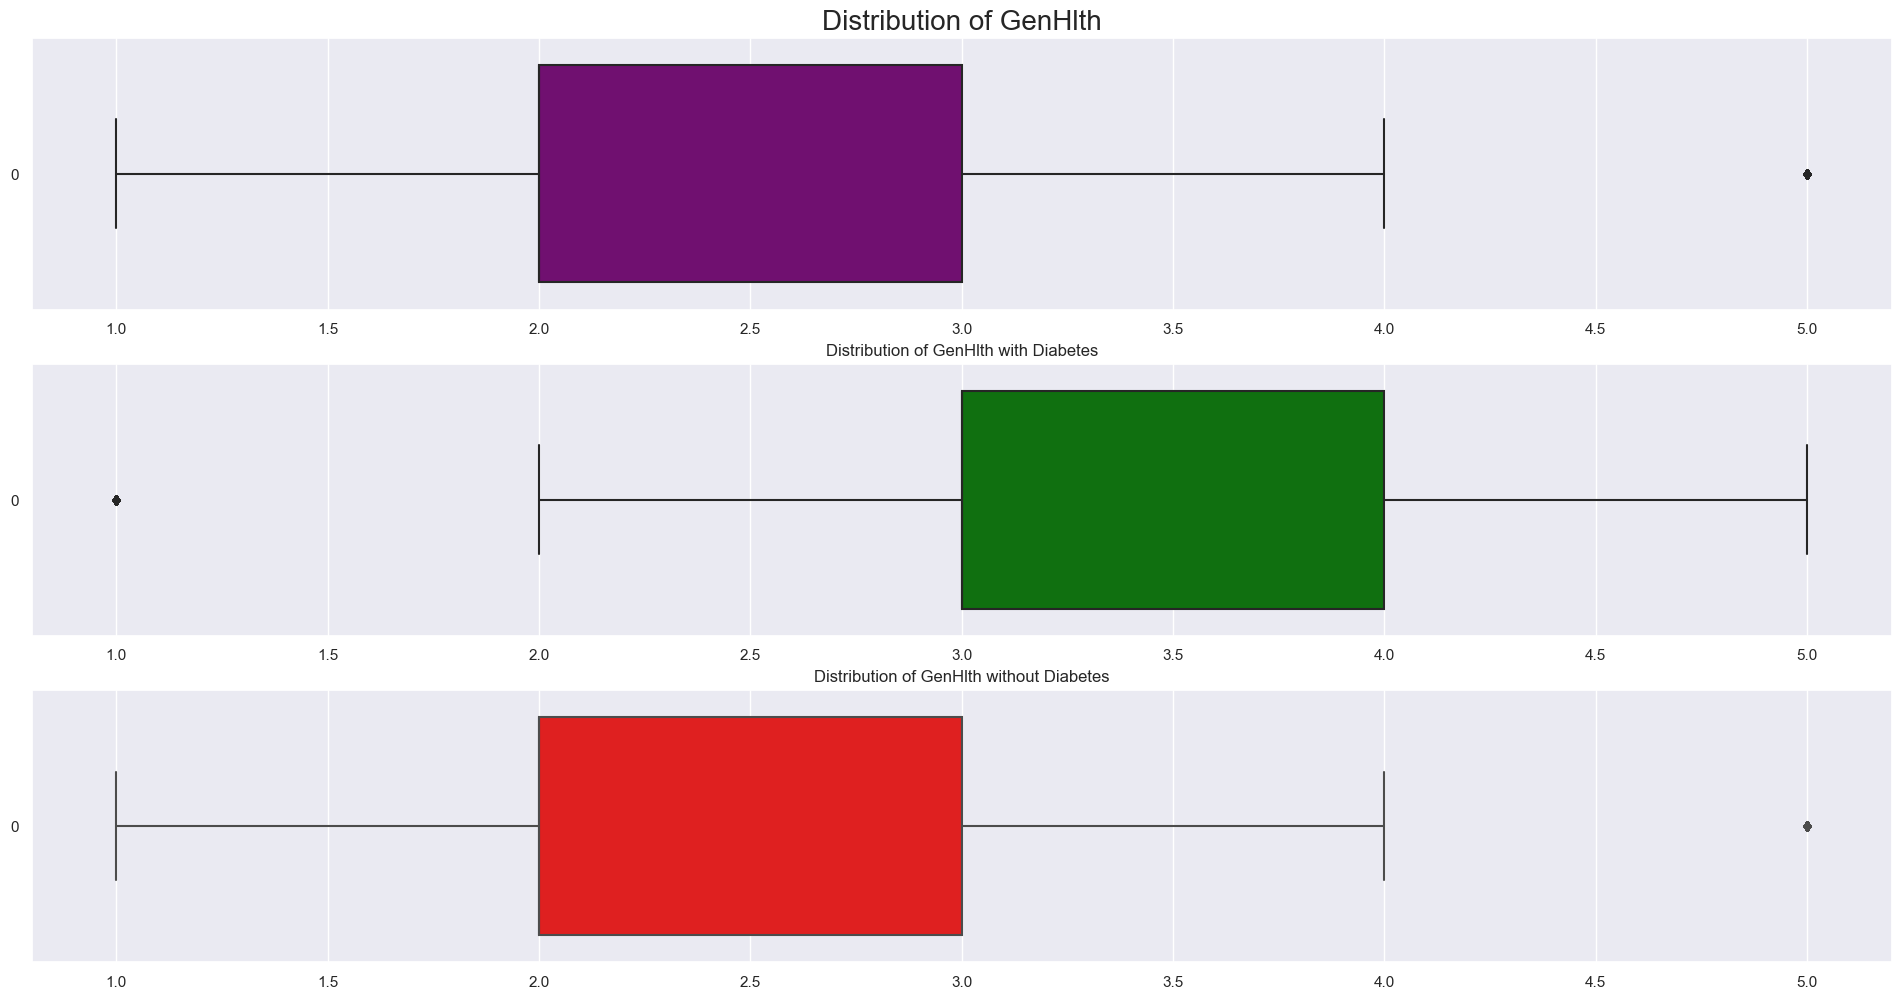

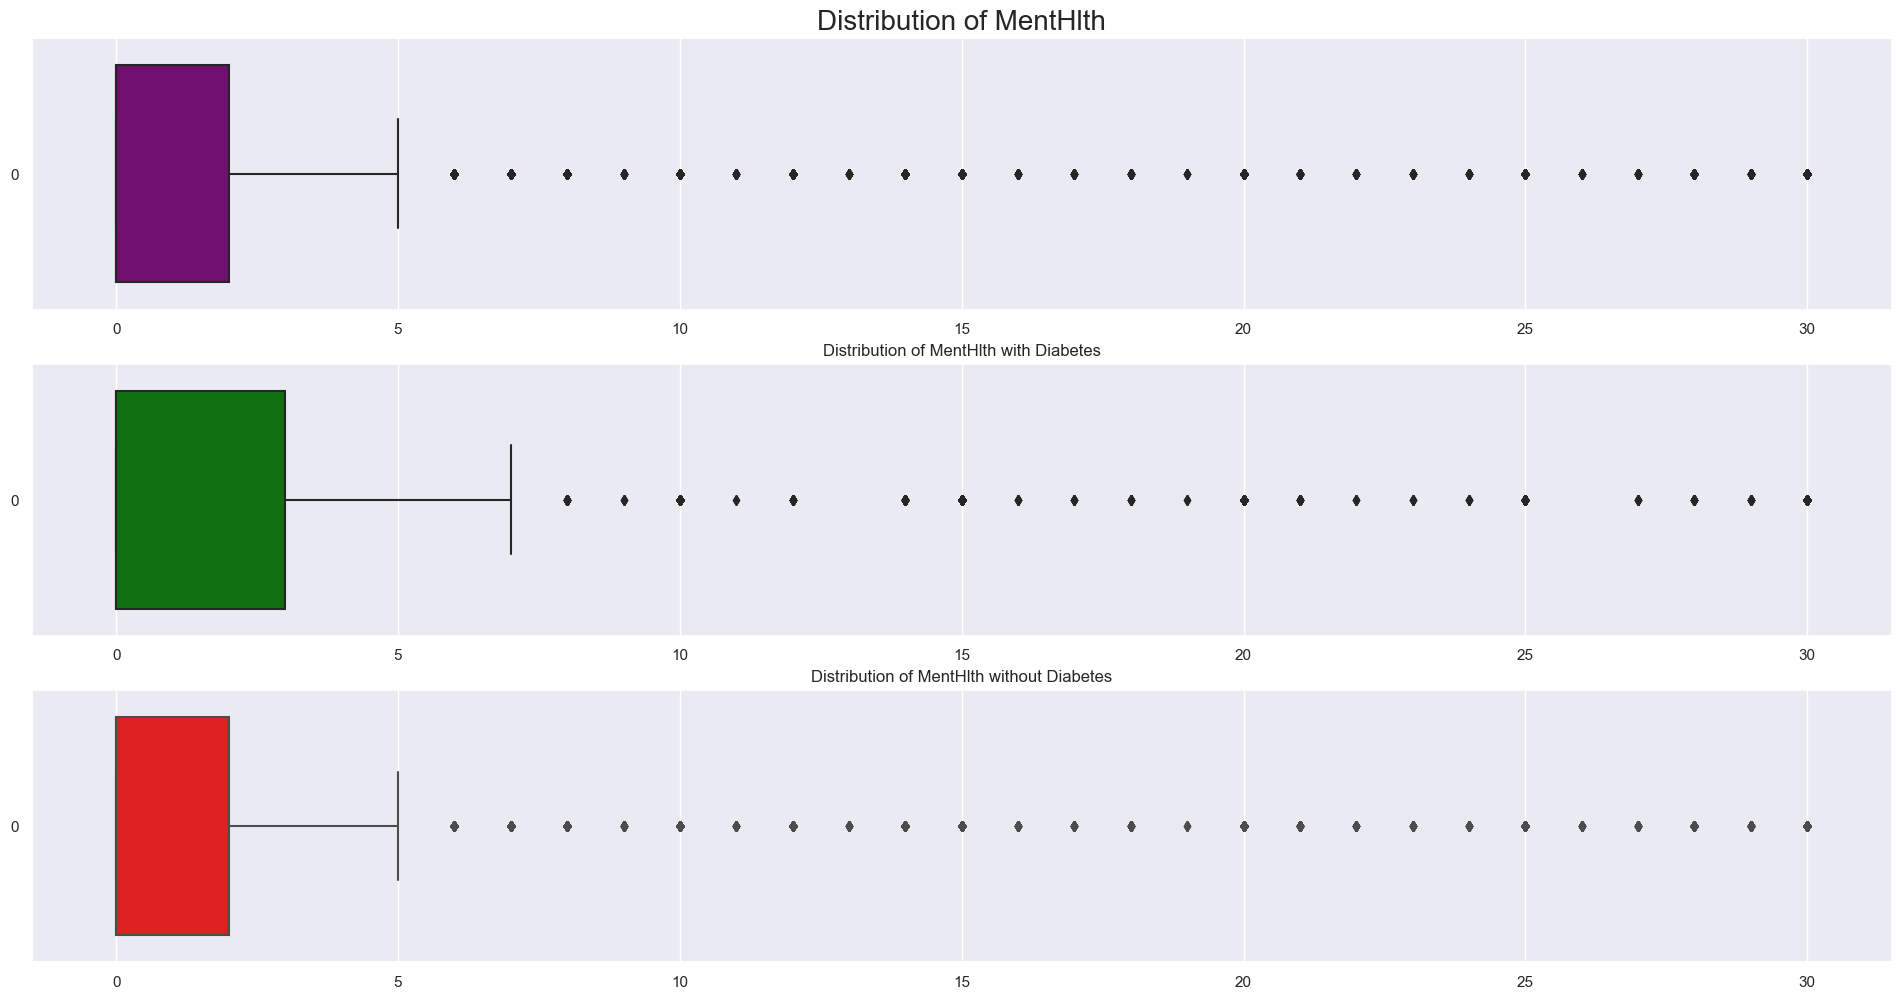

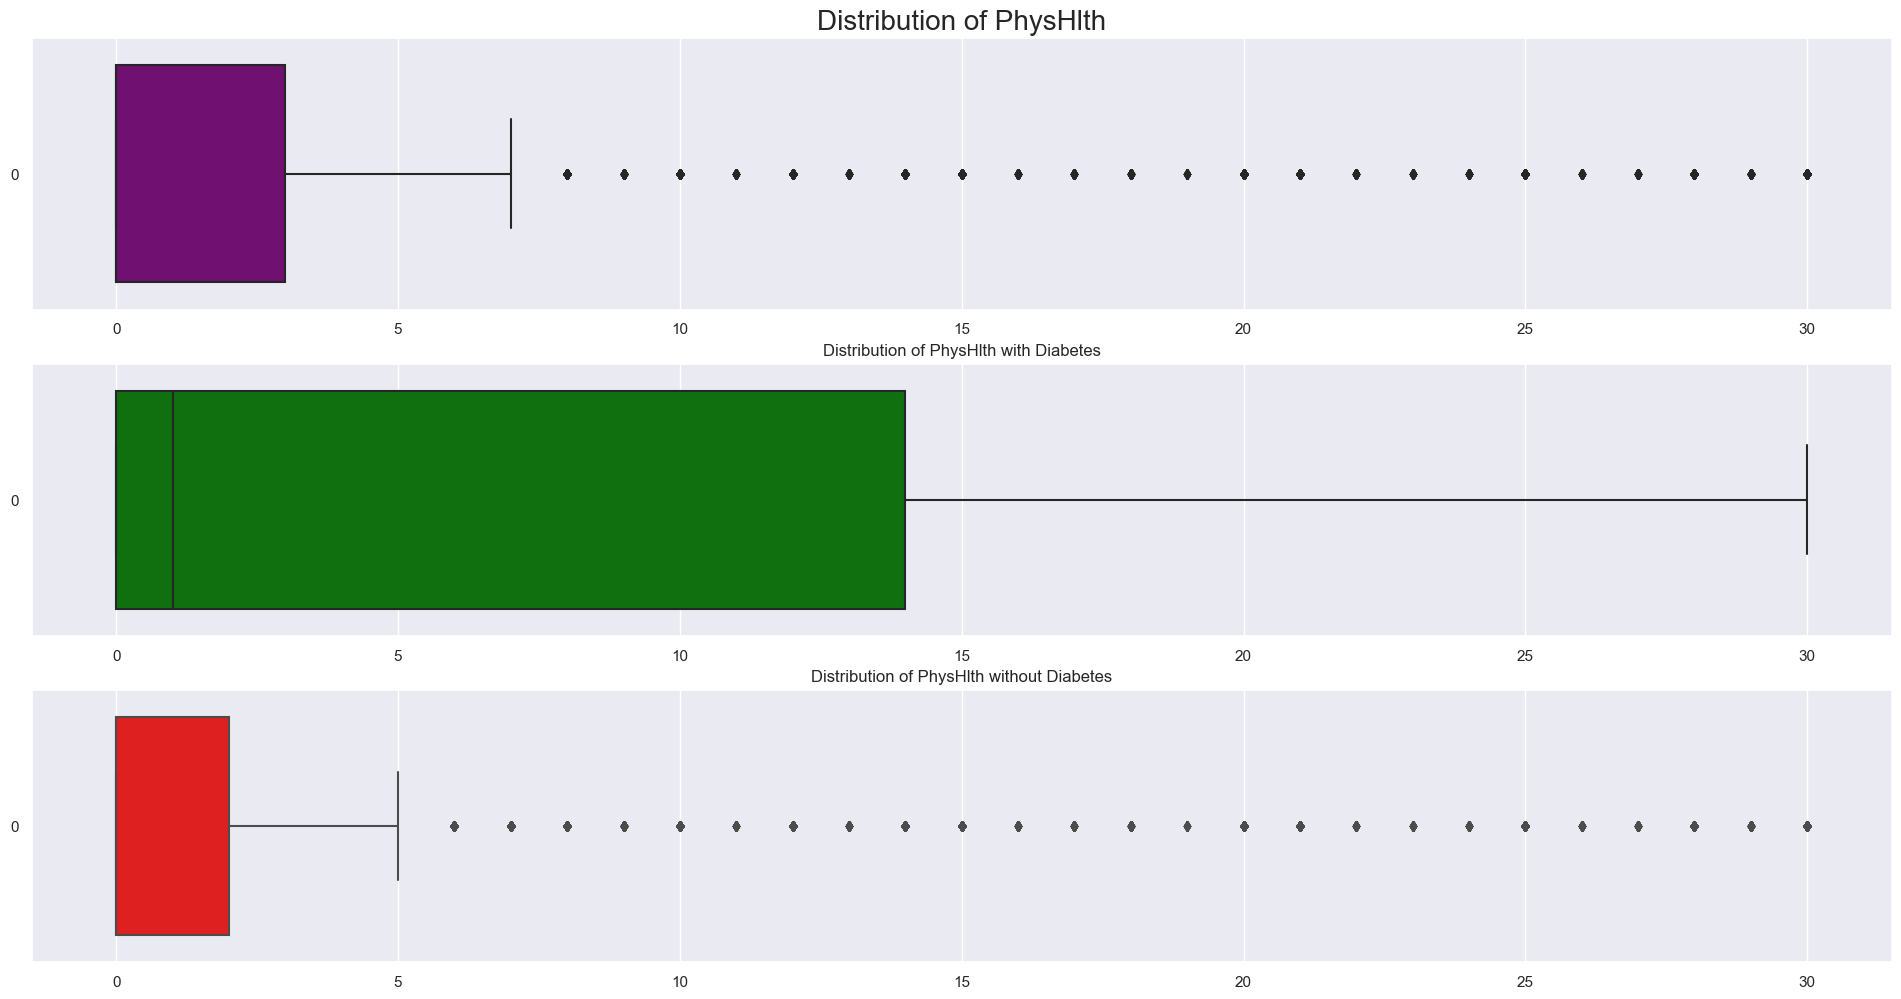

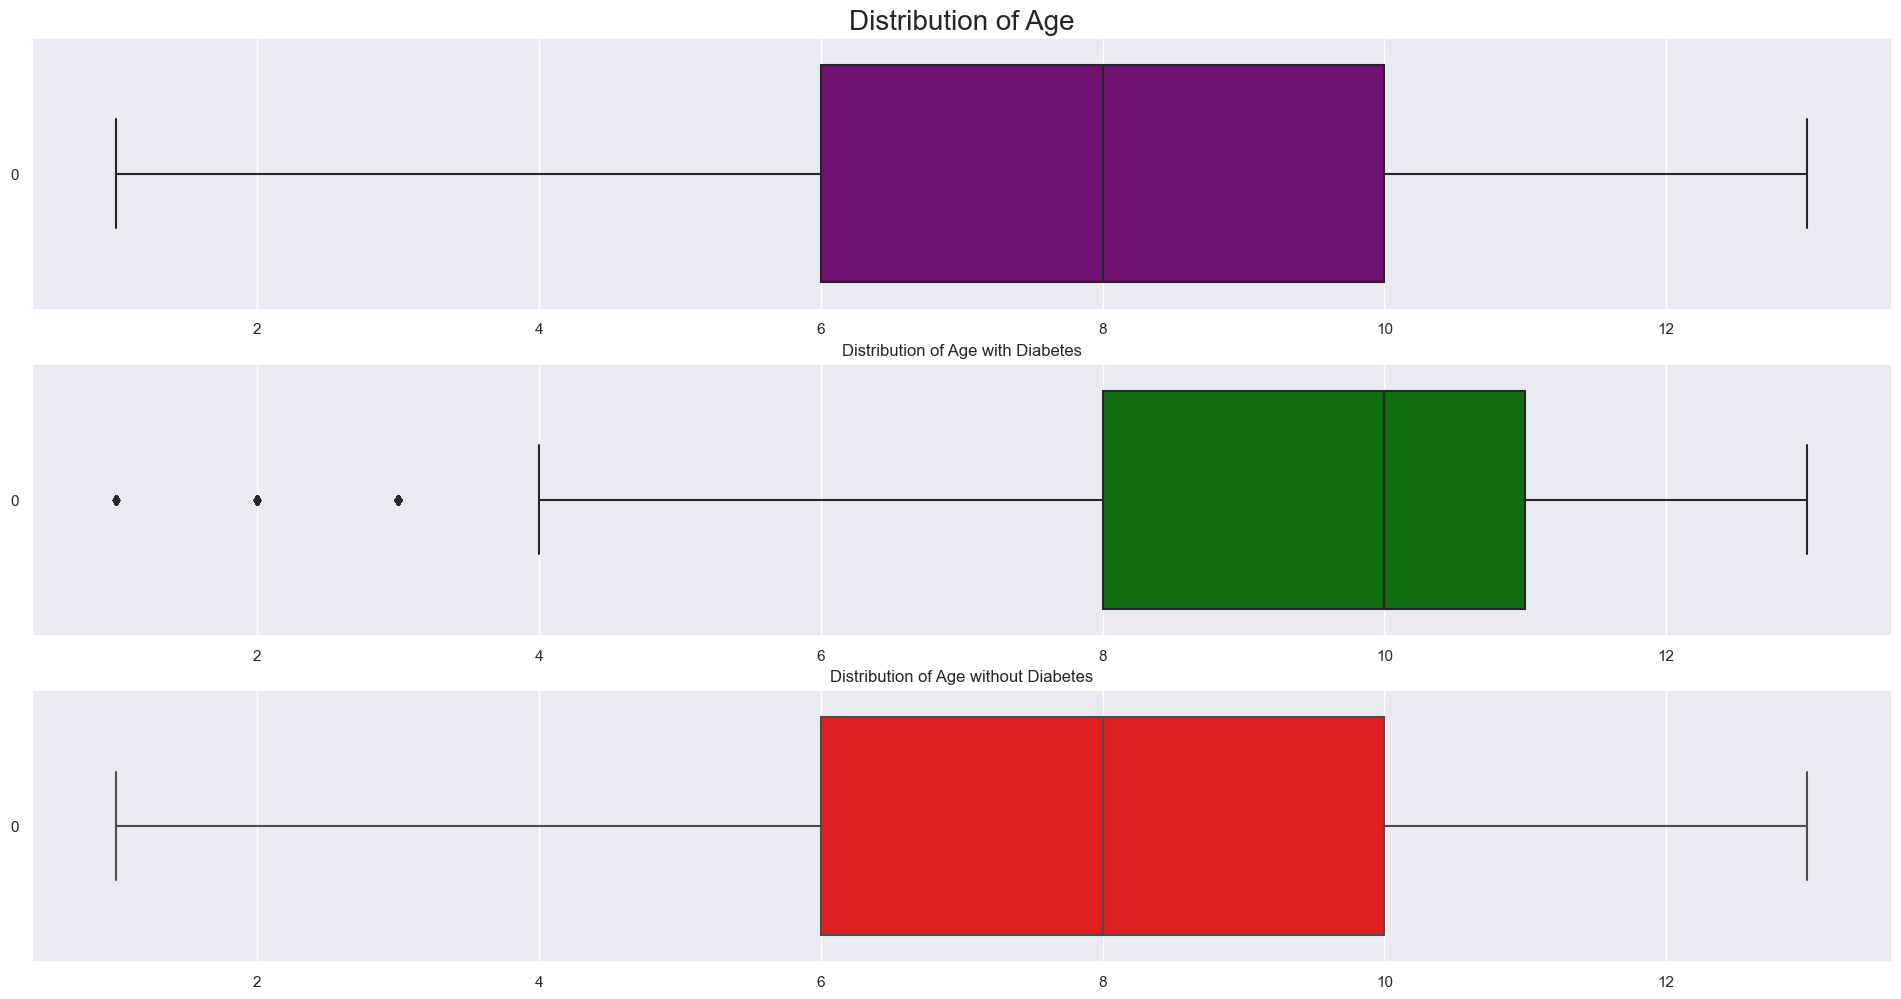

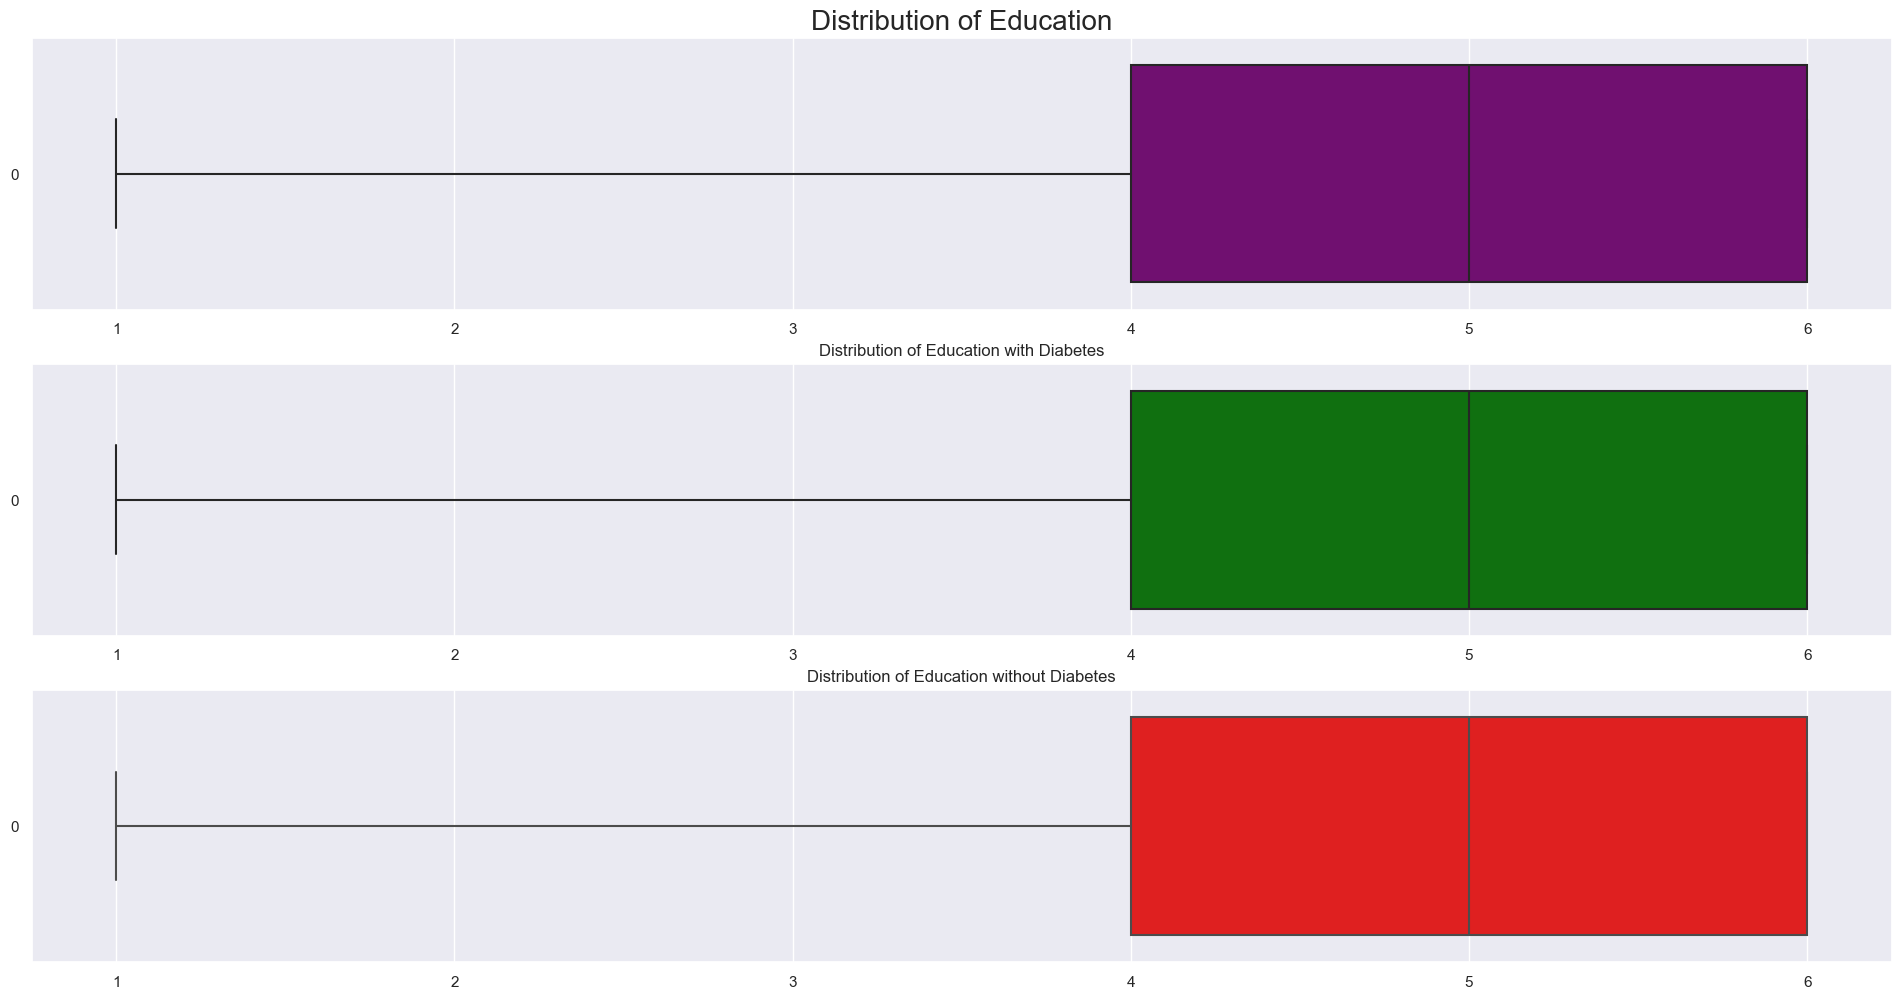

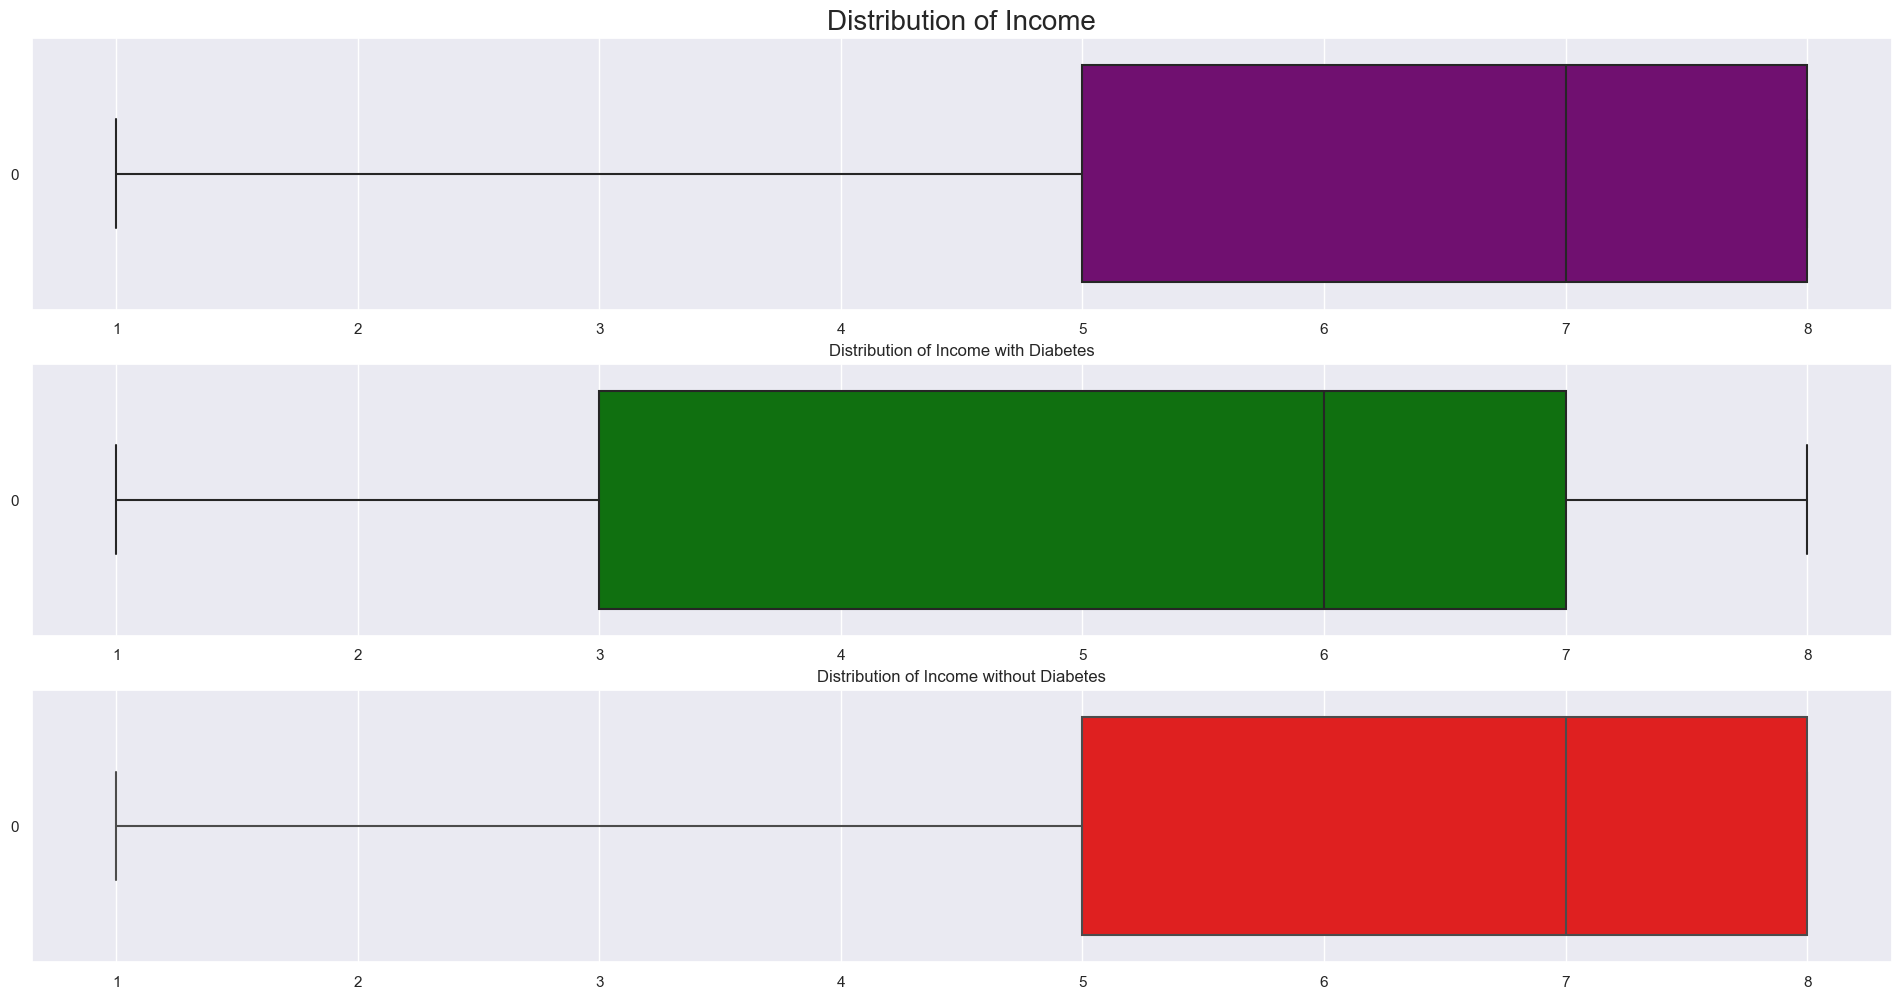

In [19]:
list = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]

for var in list:
    mask1 = diabetes_use[diabetes_use['Diabetes_binary']==1]
    mask0 = diabetes_use[diabetes_use['Diabetes_binary']==0]
    f, axes = plt.subplots(3, figsize=(24,12))

    sb.boxplot(data=diabetes_use[var], orient='h', color = "purple", ax = axes[0]).set_title("Distribution of " + var, fontsize = 20)
    sb.boxplot(data=mask1[var].values, orient = 'h', color = "green", ax=axes[1]).set_title("Distribution of " + var + " with Diabetes")
    sb.boxplot(data=mask0[var].values, orient = 'h', color = "red", ax=axes[2]).set_title("Distribution of " + var + " without Diabetes")

# **BMI**(BMI)
We choose the variable `BMI`, as from the boxplot, we can observe that the median BMI of diabetes patients is higher than the median BMI of those without diabetes. 
> Body Mass Index

# **General Health Condition**(GenHlth)
We chose `Genhlth` as one of the variables used to predict diatribes as the distribution of the data of diabetes and non-diabetes patients varies significantly. Therefore, it is easy to predict whether one has diabetes by looking at his/her general health conditions.
>**1** = Excellent
>**2** = Very Good
>**3** = Good
>**4** = Fair
>**5** = Poor

# **Physical Health Condition**(PhysHlth)
By observing the boxplot for `PhysHlth`, we found that diabetes patients suffer from poorer physical health compared to non-diabetes individuals. 
>Number of days during the past 30 days with poor physical health not good(scale 1-30 days)

# **Distribution of Age**(Age)
By observing the boxplot for `Age`, we found that the distribution of age of diabetes patients is older compared to non-diabetes ones. This indicates that older age leads to higher risk of diabetes.
>13-level age category
>**1** = 18-24 
>**9** = 60-64 
>**13** = 80 or older

# **Distribution of Income**(Income)
We also decided to choose `income` as one of the variables in diabetes prediction. By studying the box plot of `income`, we found that the income of diabetes patients is generally lower than those without diabetes. This might be due to the quality of living and the accessibility of healthy food and medical care. 
>Income scale (scale 1-8) 
>**1** = less than 10,000 
>**5** = less than 35,000 
>**8** = 75,000 or more

#### Remove outliers

In [23]:
Q1 = diabetes_use["BMI"].quantile(0.25)
Q3 = diabetes_use["BMI"].quantile(0.75)
IQR = Q3 - Q1

clean = diabetes_use[(diabetes_use["BMI"] < Q3+1.5*IQR) & (diabetes_use["BMI"] > Q1-1.5*IQR)]

In [24]:
file_path = "dataset/diabetes_EDA.csv"

clean.to_csv(path_or_buf = file_path, index=False)